---
# -------HEART DISEASE PREDICTION USING CLASSIFICATION MODELS-------
---

![Coronary Heart Disease](headimg.jpeg)

### Dataset Information

##### Source Information:
   -- [Cleveland Clinic Foundation (cleveland.data)](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
---
##### Number of Instances: 
    303
---    
##### Attribute Information:
    Only 14 used out of 76
    
        1. #3  (Age)          age in years  
        
        2. #4  (Sex)          sex (1 = male; 0 = female)
        3. #9  (ChestPain)    chest pain type(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
        
        4. #10 (RestBPS)      resting blood pressure (in mm Hg)
        
        5. #12 (Cholestrol)   serum cholestoral in mg/dl
        
        6. #16 (FBS)          fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        
        7. #19 (RestECG)      resting ecg (0: normal, 1: having ST-T wave abnormality, 2: left ventricular hypertrophy)
        
        8. #32 (MaxHR)        maximum heart rate achieved
        
        9. #38 (Exang)        exercise induced angina (1 = yes; 0 = no)
        
        10. #40 (OldPeak)     ST depression induced by exercise relative to rest
        
        11. #41 (Slope)       slope of peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
        
        12. #44 (Nmajvess)    number of major vessels (0-3) colored by flourosopy
        
        13. #51 (Thal)        3 = normal; 6 = fixed defect; 7 = reversable defect
        
        14. #58 (ADS)       (the predicted attribute)
                              diagnosis of heart disease (angiographic disease status)
                              0: less than 50% narrowing in any major vessel, 
                              1-4: more than 50% narrowing in 1-4 vessels
                            UPDATED AS BELOW, AS ENOUGH DATA WAS NOT PROVIDED
                              0: < 50% diameter narrowing
                              1: > 50% diameter narrowing

## Libraries to be used are imported once and all.

In [1]:
# importing librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing preprocessing and metrics librariesabs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# importing the sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Dataset is read, and column names updated.

In [2]:
# reading the csv file as pandas dataframe
dataset = pd.read_csv('processedheart.csv',  header = None)
dataset.columns = ['Age', 'Sex', 'ChestPain', 'RestBPS', 'Cholestrol', 'FBS',
       'RestECG', 'MaxHR', 'Exang', 'OldPeak', 'Slope', 'Nmajvess',
       'Thal', 'ADS']
dataset.head()

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
# checking for missing values
dataset.isin(['?']).sum()

Age           0
Sex           0
ChestPain     0
RestBPS       0
Cholestrol    0
FBS           0
RestECG       0
MaxHR         0
Exang         0
OldPeak       0
Slope         0
Nmajvess      4
Thal          2
ADS           0
dtype: int64

## Imputing Thal and Nmajvess

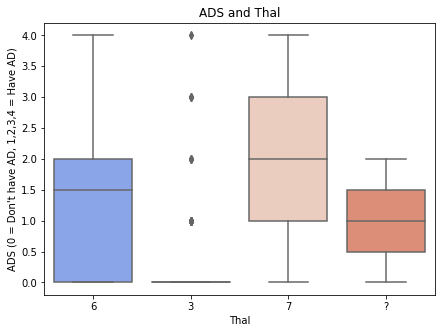

In [4]:
# box plot to check the distribution of 'Thal' values
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'Thal', y= 'ADS', data= dataset, palette= 'coolwarm')
plt.ylabel("ADS (0 = Don't have AD, 1,2,3,4 = Have AD)")
plt.title('ADS and Thal')
plt.show()

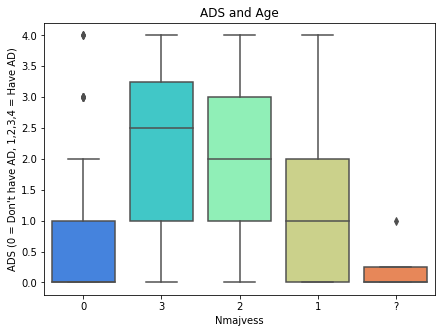

In [5]:
# box plot to check the distribution of 'Nmajvess' values
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'Nmajvess', y= 'ADS', data= dataset, palette= 'rainbow')
plt.ylabel("ADS (0 = Don't have AD, 1,2,3,4 = Have AD)")
plt.title('ADS and Age')
plt.show()

In [6]:
# TWO Missing 'Thal' values are updated to 6
# FOUR Missing 'Nmajvess' values are updated to 3
# For any of vessels when narrowing is more than 50%, 'ADS'(predicted value) is categorised as 1

for i in range(len(dataset['Age'])):
    if dataset['ADS'][i] > 1:
        dataset['ADS'][i] = 1
    if dataset['Thal'][i] == '?':
        dataset['Thal'][i] = '6'
    if dataset['Nmajvess'][i] == '?':
        dataset['Nmajvess'][i] = '3'
        
dataset.head(10)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [7]:
dataset.isin(['?']).sum()
# No missing values in dataset

Age           0
Sex           0
ChestPain     0
RestBPS       0
Cholestrol    0
FBS           0
RestECG       0
MaxHR         0
Exang         0
OldPeak       0
Slope         0
Nmajvess      0
Thal          0
ADS           0
dtype: int64

In [8]:
# Encoding the categorical variables having more than 2 categories
# 'Chestpain', 'Slope', 'Thal', 'Nmajvess'
encoder = LabelEncoder()
dataset['ChestPain'] =  encoder.fit_transform(dataset['ChestPain'])
dataset['Slope'] =  encoder.fit_transform(dataset['Slope'])
dataset['Thal'] =  encoder.fit_transform(dataset['Thal'])
dataset['Nmajvess'] =  encoder.fit_transform(dataset['Nmajvess'])
dataset.head(10)

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,0,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,0,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,2,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,2,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null int64
RestBPS       303 non-null int64
Cholestrol    303 non-null int64
FBS           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
Exang         303 non-null int64
OldPeak       303 non-null float64
Slope         303 non-null int64
Nmajvess      303 non-null int64
Thal          303 non-null int64
ADS           303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Data Exploration using Graphs/Plots

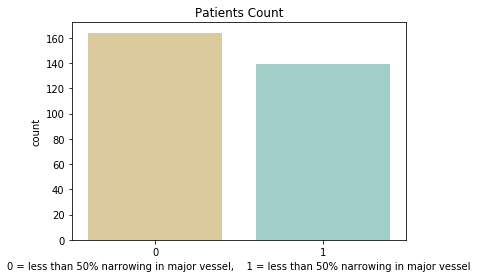

0    164
1    139
Name: ADS, dtype: int64


In [10]:
# Number of persons having and not having ADS
sns.countplot(x="ADS", data= dataset, palette= "BrBG")
plt.xlabel("0 = less than 50% narrowing in major vessel,    1 = less than 50% narrowing in major vessel")
plt.title('Patients Count')
plt.show()

print(dataset.ADS.value_counts(sort= False))

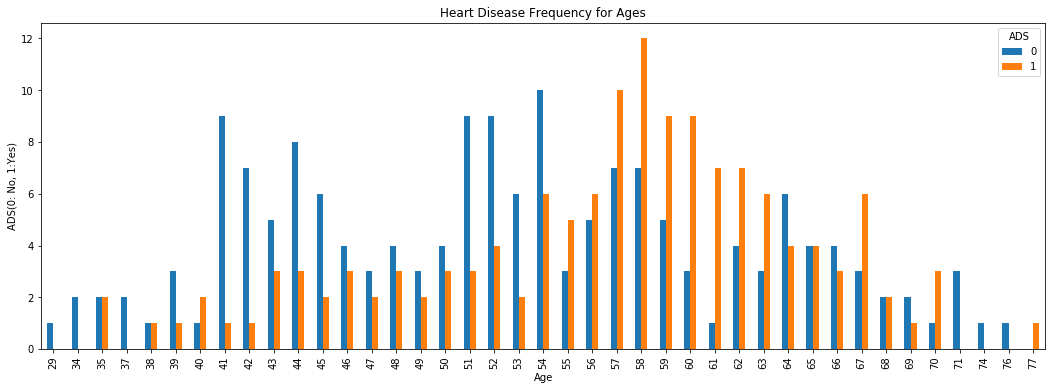

In [11]:
pd.crosstab(dataset.Age,dataset.ADS).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('ADS(0: No, 1:Yes)')
# plt.savefig('ADSAndAges.png')
plt.show()

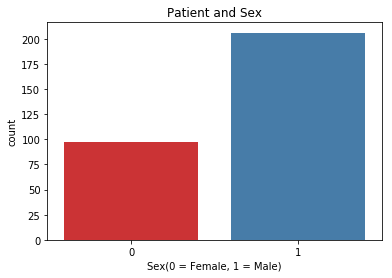

0     97
1    206
Name: Sex, dtype: int64


In [12]:
# Sex distribution of patients 
sns.countplot(x= 'Sex', data= dataset, palette= 'Set1')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.title('Patient and Sex')
plt.show()

print(dataset.Sex.value_counts(sort = False))

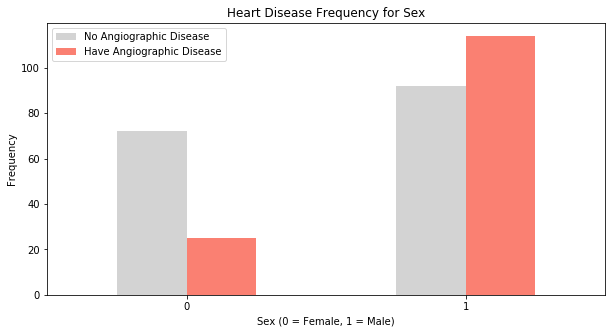

In [13]:
# Sex vs ADS Distribution
pd.crosstab(dataset.Sex,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['lightgray','Salmon' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
# plt.savefig('ADSAndSex.png')
plt.show()

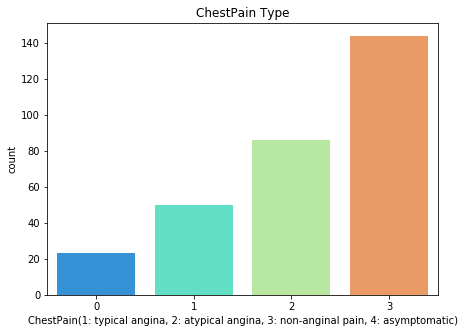

0     23
1     50
2     86
3    144
Name: ChestPain, dtype: int64


In [14]:
# ChestPain distribution of patients
plt.figure(figsize=(7, 5))
sns.countplot(x="ChestPain", data= dataset, palette= "rainbow")
plt.xlabel("ChestPain(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)")
plt.title('ChestPain Type')
plt.show()

print(dataset.ChestPain.value_counts(sort= False))

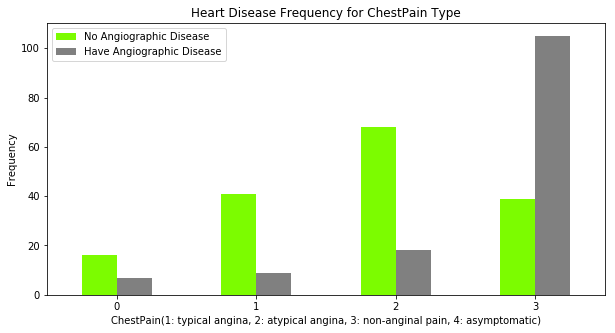

In [15]:
# ChestPain vs ADS Distribution
pd.crosstab(dataset.ChestPain,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['lawngreen','gray' ])
plt.title('Heart Disease Frequency for ChestPain Type')
plt.xlabel("ChestPain(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
# plt.savefig('ADSAndChestPain.png')
plt.show()

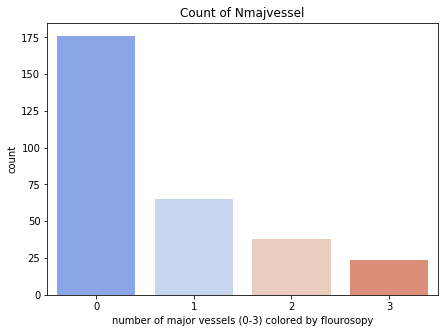

0    176
1     65
2     38
3     24
Name: Nmajvess, dtype: int64


In [16]:
# Nmajvess Distribution of patients
plt.figure(figsize=(7, 5))
sns.countplot(x="Nmajvess", data= dataset, palette= "coolwarm")
plt.xlabel("number of major vessels (0-3) colored by flourosopy")
plt.title('Count of Nmajvessel')
plt.show()

print(dataset.Nmajvess.value_counts(sort= False))

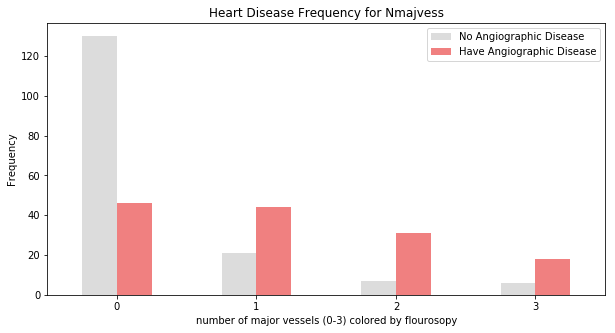

In [17]:
# Nmajvess vs ADS Distribution
pd.crosstab(dataset.Nmajvess,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['gainsboro','lightcoral'])
plt.title('Heart Disease Frequency for Nmajvess')
plt.xlabel("number of major vessels (0-3) colored by flourosopy")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
# plt.savefig('ADSAndNmajvess.png')
plt.show()

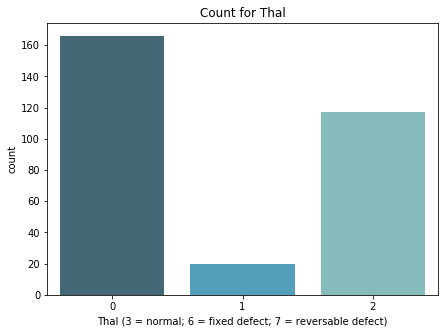

0    166
1     20
2    117
Name: Thal, dtype: int64


In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(x="Thal", data= dataset, palette= "GnBu_d")
plt.title('Count for Thal')
plt.xlabel("Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)")
plt.show()

print(dataset.Thal.value_counts(sort= False))

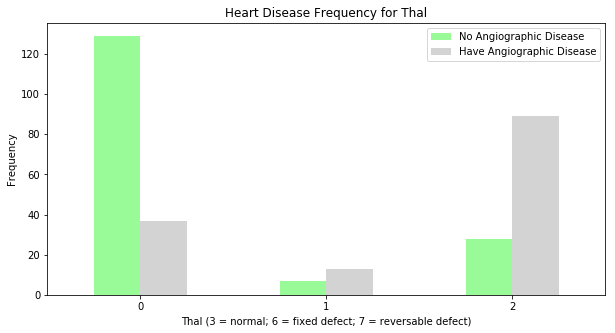

In [19]:
# Thal vs ADS Distribution
pd.crosstab(dataset.Thal,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['palegreen','lightgray'])
plt.title('Heart Disease Frequency for Thal')
plt.xlabel("Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
# plt.savefig('ADSAndThal.png')
plt.show()

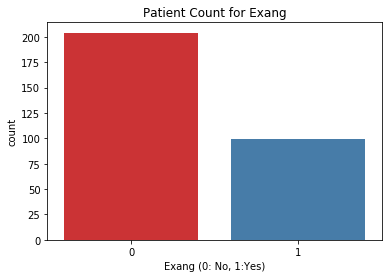

0     97
1    206
Name: Sex, dtype: int64


In [20]:
# Exang distribution of Exang
sns.countplot(x= 'Exang', data= dataset, palette= 'Set1')
plt.xlabel('Exang (0: No, 1:Yes)')
plt.title('Patient Count for Exang')
plt.show()

print(dataset.Sex.value_counts(sort = False))

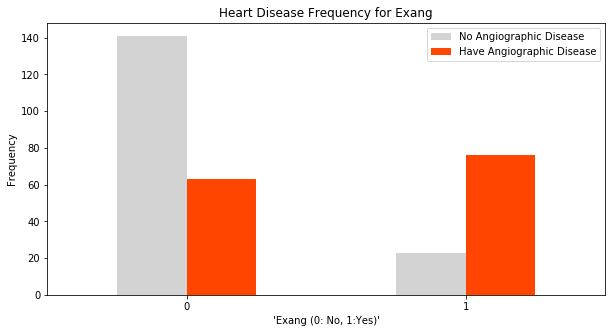

In [21]:
pd.crosstab(dataset.Exang,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['lightgray','orangered'])
plt.title('Heart Disease Frequency for Exang')
plt.xlabel("'Exang (0: No, 1:Yes)'")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
# plt.savefig('ADSAndExang.png')
plt.show()

## BOXPLOTS

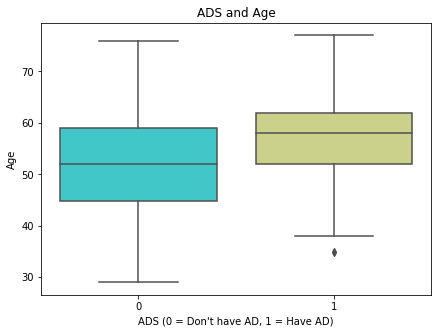

In [22]:
# boxplot for ADS vs Age
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'Age', data= dataset, palette= 'rainbow')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and Age')
# plt.savefig('boxADSandAge.png')
plt.show()

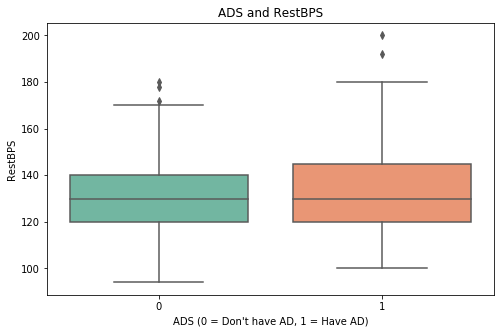

In [23]:
# boxplot for ADS vs RestBPS
plt.figure(figsize=(8, 5))
sns.boxplot(x= 'ADS', y= 'RestBPS', data= dataset, palette= 'Set2')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and RestBPS')
# plt.savefig('boxADSandRestBPS.png')
plt.show()

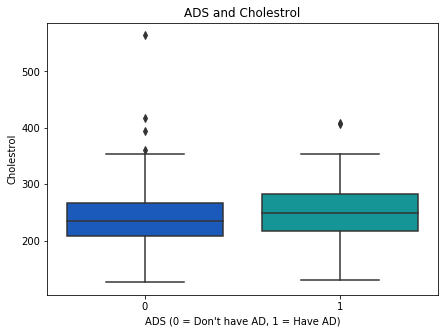

In [24]:
# boxplot for ADS vs Cholestrol
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'Cholestrol', data= dataset, palette= 'winter')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and Cholestrol')
# plt.savefig('boxADSandCholestrol.png')
plt.show()

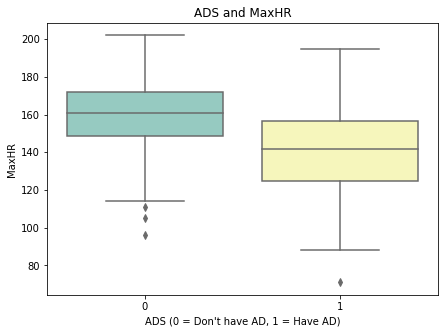

In [25]:
# boxplot for ADS vs MaxHR
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'MaxHR', data= dataset, palette= 'Set3')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and MaxHR')
# plt.savefig('boxADSandMaxHR.png')
plt.show()

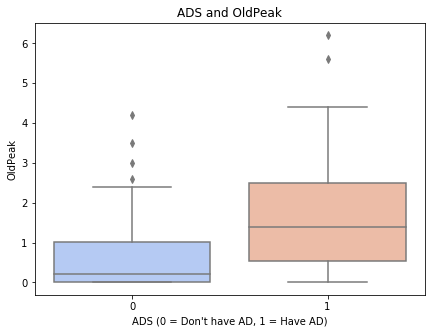

In [26]:
# boxplot for ADS vs OldPeak
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'OldPeak', data= dataset, palette= 'coolwarm')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and OldPeak')
# plt.savefig('boxADSandOldPeak.png')
plt.show()

# Data Preprocessing

In [27]:
dataset.head()

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0


In [28]:
# X-> Inependent Variables,  y-> Dependent Variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1:].values

In [29]:
# Splitting Training and Testing Data as 75%-25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [30]:
# Scaling the continuous variables
sc_X = StandardScaler()
X_train[:, [0,3,4,7,9]] = sc_X.fit_transform(X_train[:, [0,3,4,7,9]])
X_test[:, [0,3,4,7,9]] = sc_X.transform(X_test[:, [0,3,4,7,9]])

# Logistic Regression

In [31]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic_pred = logistic.predict(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
logistic_cm = confusion_matrix(y_test, logistic_pred)
print(classification_report(y_test, logistic_pred))
logistic_cm

             precision    recall  f1-score   support

          0       0.85      0.87      0.86        39
          1       0.86      0.84      0.85        37

avg / total       0.86      0.86      0.86        76



array([[34,  5],
       [ 6, 31]])

In [33]:
logistic_pred_train = logistic.predict(X_train)
logistic_cm_train = confusion_matrix(y_train, logistic_pred_train)
print(classification_report(y_train, logistic_pred_train))
logistic_cm_train

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       125
          1       0.85      0.77      0.81       102

avg / total       0.84      0.84      0.84       227



array([[111,  14],
       [ 23,  79]])

# K-Nearest Neighbors (KNN) Classification

In [34]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [35]:
print(classification_report(y_test, knn_pred))
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm

             precision    recall  f1-score   support

          0       0.89      0.87      0.88        39
          1       0.87      0.89      0.88        37

avg / total       0.88      0.88      0.88        76



array([[34,  5],
       [ 4, 33]])

In [36]:
knn_pred_train = knn.predict(X_train)
knn_cm_train = confusion_matrix(y_train, knn_pred_train)
print(classification_report(y_train, knn_pred_train))
knn_cm_train

             precision    recall  f1-score   support

          0       0.87      0.90      0.88       125
          1       0.87      0.83      0.85       102

avg / total       0.87      0.87      0.87       227



array([[112,  13],
       [ 17,  85]])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


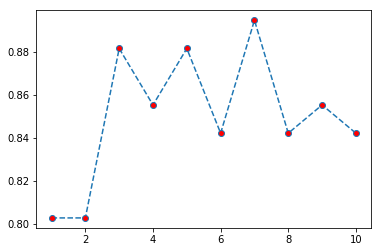

89.47%


In [37]:
score = []
for i in range(1,11):
    knn_check = KNeighborsClassifier(n_neighbors= i)
    knn_check.fit(X_train, y_train)
    knn_pred_check = knn_check.predict(X_test)
    score.append(knn_check.score(X_test, y_test))
plt.plot(range(1,11), score, linestyle='dashed', marker='o', markerfacecolor='red')
plt.show() 

print("{:.2f}%".format(max(score)*100))

# Support Vector Classifier

In [38]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print(classification_report(y_test, svm_pred))
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm

             precision    recall  f1-score   support

          0       0.88      0.90      0.89        39
          1       0.89      0.86      0.88        37

avg / total       0.88      0.88      0.88        76



array([[35,  4],
       [ 5, 32]])

In [40]:
svm_pred_train = svm.predict(X_train)
svm_cm_train = confusion_matrix(y_train, svm_pred_train)
print(classification_report(y_train, svm_pred_train))
svm_cm_train

             precision    recall  f1-score   support

          0       0.86      0.94      0.90       125
          1       0.92      0.80      0.86       102

avg / total       0.88      0.88      0.88       227



array([[118,   7],
       [ 20,  82]])

# Naive-Bayes Classifier

In [41]:
naiveb = GaussianNB()
naiveb.fit(X_train, y_train)
naiveb_pred = naiveb.predict(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print(classification_report(y_test, naiveb_pred))
naiveb_cm = confusion_matrix(y_test, naiveb_pred)
naiveb_cm

             precision    recall  f1-score   support

          0       0.81      0.90      0.85        39
          1       0.88      0.78      0.83        37

avg / total       0.85      0.84      0.84        76



array([[35,  4],
       [ 8, 29]])

In [43]:
naiveb_pred_train = naiveb.predict(X_train)
print(classification_report(y_train, naiveb_pred_train))
naiveb_cm_train = confusion_matrix(y_train, naiveb_pred_train)
naiveb_cm_train

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       125
          1       0.85      0.80      0.83       102

avg / total       0.85      0.85      0.85       227



array([[111,  14],
       [ 20,  82]])

# Decision Tree Classifier

In [44]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf=8)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [45]:
print(classification_report(y_test, dtree_pred))
dtree_cm = confusion_matrix(y_test, dtree_pred)
dtree_cm

             precision    recall  f1-score   support

          0       0.82      0.85      0.84        39
          1       0.83      0.81      0.82        37

avg / total       0.83      0.83      0.83        76



array([[33,  6],
       [ 7, 30]])

In [46]:
dtree_pred_train = dtree.predict(X_train)
print(classification_report(y_train, dtree_pred_train))
dtree_cm_train = confusion_matrix(y_train, dtree_pred_train)
dtree_cm_train

             precision    recall  f1-score   support

          0       0.86      0.90      0.88       125
          1       0.87      0.81      0.84       102

avg / total       0.86      0.86      0.86       227



array([[113,  12],
       [ 19,  83]])

In [47]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ImportError: No module named 'pydotplus'

# Random Forest Classifier

In [48]:
forest = RandomForestClassifier(criterion= 'entropy', n_estimators= 800, max_depth= 5, min_samples_leaf=8, random_state=101)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [49]:
print(classification_report(y_test, forest_pred))
forest_cm = confusion_matrix(y_test, forest_pred)
forest_cm

             precision    recall  f1-score   support

          0       0.85      0.90      0.88        39
          1       0.89      0.84      0.86        37

avg / total       0.87      0.87      0.87        76



array([[35,  4],
       [ 6, 31]])

In [50]:
forest_pred_train = forest.predict(X_train)
print(classification_report(y_train, forest_pred_train))
forest_cm_train = confusion_matrix(y_train, forest_pred_train)
forest_cm_train

             precision    recall  f1-score   support

          0       0.84      0.94      0.88       125
          1       0.91      0.77      0.84       102

avg / total       0.87      0.86      0.86       227



array([[117,   8],
       [ 23,  79]])

In [51]:
print("Logistic Regression Test Accuracy {:.2f}%".format(logistic.score(X_test, y_test)*100))
print("KNN Test Accuracy {:.2f}%".format(knn.score(X_test, y_test)*100))
print("SVM Test Accuracy {:.2f}%".format(svm.score(X_test, y_test)*100))
print("Naive Bayes Logistic Regression Test Accuracy {:.2f}%".format(naiveb.score(X_test, y_test)*100))
print("Decison Tree Test Accuracy {:.2f}%".format(dtree.score(X_test, y_test)*100))
print("Random Forest Test Accuracy {:.2f}%".format(forest.score(X_test, y_test)*100))


Logistic Regression Test Accuracy 85.53%
KNN Test Accuracy 88.16%
SVM Test Accuracy 88.16%
Naive Bayes Logistic Regression Test Accuracy 84.21%
Decison Tree Test Accuracy 82.89%
Random Forest Test Accuracy 86.84%


# 60-40
## Logistic Regression Test Accuracy 82.79%
## KNN Test Accuracy 81.97%
## SVM Test Accuracy 87.70%
## Naive Bayes Logistic Regression Test Accuracy 84.43%
## Decison Tree Test Accuracy 79.51%
## Random Forest Test Accuracy 85.25%

# Feature Extraction

### Filter Method

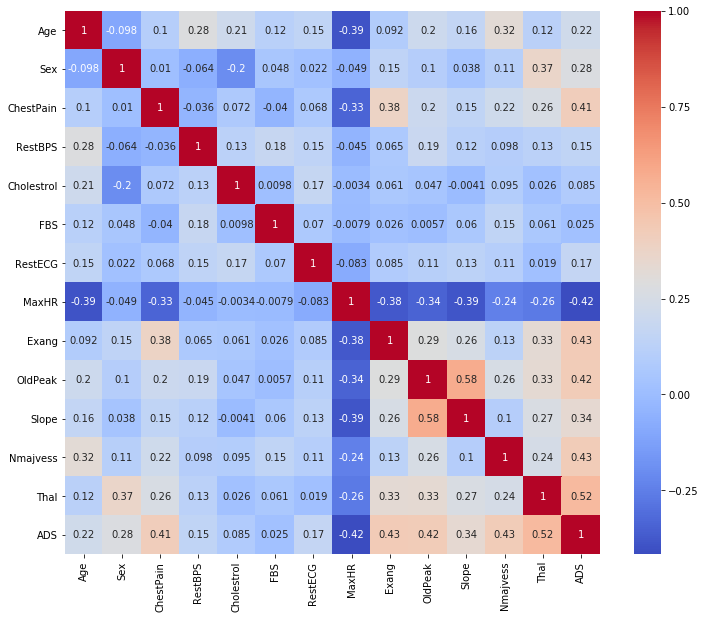

In [52]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
# plt.savefig('HEATMAP.png')
plt.show()

In [53]:
#Correlation with output variable
cor_target = abs(cor["ADS"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

ChestPain    0.414446
MaxHR        0.417167
Exang        0.431894
OldPeak      0.424510
Slope        0.339213
Nmajvess     0.426670
Thal         0.517722
ADS          1.000000
Name: ADS, dtype: float64

### Backward Eliminition

In [54]:
import statsmodels.formula.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)

#Fitting sm.OLS model
model = sm.OLS(y,X_1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]).fit()
# model.summary()

In [55]:
#Fitting sm.OLS model
model = sm.OLS(y,X_1[:,[2,3,4,7,8,9,10,11,12,13]]).fit()
print(model.pvalues)
# model.summary()

[3.97387753e-03 5.94710661e-05 8.19814243e-02 7.05235459e-02
 4.68133942e-04 3.66385159e-03 5.23168339e-02 2.04298280e-01
 5.80490122e-07 2.27722057e-06]


In [56]:
#Fitting sm.OLS model
model = sm.OLS(y,X_1[:,[2,3,8,9,10,12,13]]).fit()
# print(model.pvalues)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     115.0
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.39e-80
Time:                        06:24:36   Log-Likelihood:                -112.86
No. Observations:                 303   AIC:                             239.7
Df Residuals:                     296   BIC:                             265.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1342      0.047      2.848      0.005       0.041       0.227
x2             0.1032      0.022      4.649      0.000       0.060       0.147
x3            -0.0012      0.000     -3.648      0.000      -0.002      -0.001
x4             0.1706      0.050      3.401      0.001       0.072       0.269
x5             0.0731      0.019      3.797      0.000       0.035       0.111
x6             0.1218      0.022      5.425      0.000       0.078       0.166
x7             0.1284      0.025      5.033      0.000       0.078       0.179
==============================================================================
Omnibus:                        9.731   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.758
Skew:                           0.404   Prob(JB):                      0.00760
Kurtosis:                       3.345   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Embedded Method

In [57]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = ['Age', 'Sex', 'ChestPain', 'RestBPS', 'Cholestrol', 'FBS', 'RestECG',
       'MaxHR', 'Exang', 'OldPeak', 'Slope', 'Nmajvess', 'Thal'])
print(coef)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.004747
Best score using built-in LassoCV: 0.522779
Age          -0.000434
Sex           0.126113
ChestPain     0.088306
RestBPS       0.001808
Cholestrol    0.000383
FBS          -0.022567
RestECG       0.032021
MaxHR        -0.002907
Exang         0.125250
OldPeak       0.045738
Slope         0.041864
Nmajvess      0.111705
Thal          0.123797
dtype: float64


### Using all above methods, 'Thal', 'Nmajvess', 'OldPeak', 'Slope', 'MaxHR', 'ChestPain', 'Exang', 'Sex' are the most correlated features

In [58]:
Xn = X[:, [1,2,7,8,9,10,11,12]]

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size = 0.25, random_state = 42)

# # Scaling the continuous variables
# sc_Xn = StandardScaler()
# Xn_train[:, [2,4]] = sc_Xn.fit_transform(X_train[:, [2,4]])
# Xn_test[:, [2,4]] = sc_Xn.transform(X_test[:, [2,4]])

svmn = SVC()
svmn.fit(Xn_train, yn_train)
svmn_pred = svmn.predict(Xn_test)

print(classification_report(yn_test, svmn_pred))
svmn_cm = confusion_matrix(yn_test, svmn_pred)
print(svmn_cm)

svmn_pred_train = svmn.predict(Xn_train)
svmn_cm_train = confusion_matrix(yn_train, svmn_pred_train)
print(classification_report(yn_train, svmn_pred_train))
print(svmn_cm_train)

print("{:.2f}%".format(svmn.score(Xn_test, yn_test)*100))

             precision    recall  f1-score   support

          0       0.68      0.82      0.74        39
          1       0.76      0.59      0.67        37

avg / total       0.72      0.71      0.71        76

[[32  7]
 [15 22]]
             precision    recall  f1-score   support

          0       0.91      0.96      0.93       125
          1       0.95      0.88      0.91       102

avg / total       0.93      0.93      0.92       227

[[120   5]
 [ 12  90]]
71.05%


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
Xn = X[:, [1,2,7,8,9,10,11,12]]

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size = 0.40, random_state = 42)

# # Scaling the continuous variables
# sc_Xn = StandardScaler()
# Xn_train[:, [2,4]] = sc_Xn.fit_transform(X_train[:, [2,4]])
# Xn_test[:, [2,4]] = sc_Xn.transform(X_test[:, [2,4]])

svmn = KNeighborsClassifier(n_neighbors=5)
svmn.fit(Xn_train, yn_train)
svmn_pred = svmn.predict(Xn_test)

print(classification_report(yn_test, svmn_pred))
svmn_cm = confusion_matrix(yn_test, svmn_pred)
print(svmn_cm)

svmn_pred_train = svmn.predict(Xn_train)
svmn_cm_train = confusion_matrix(yn_train, svmn_pred_train)
print(classification_report(yn_train, svmn_pred_train))
print(svmn_cm_train)

print("{:.2f}%".format(svmn.score(Xn_test, yn_test)*100))

             precision    recall  f1-score   support

          0       0.79      0.81      0.80        64
          1       0.79      0.76      0.77        58

avg / total       0.79      0.79      0.79       122

[[52 12]
 [14 44]]
             precision    recall  f1-score   support

          0       0.80      0.90      0.85       100
          1       0.86      0.73      0.79        81

avg / total       0.83      0.82      0.82       181

[[90 10]
 [22 59]]
78.69%


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [61]:
Xn = X[:, [1,2,7,8,9,10,11,12]]

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size = 0.25, random_state = 42)

# # Scaling the continuous variables
# sc_Xn = StandardScaler()
# Xn_train[:, [2,4]] = sc_Xn.fit_transform(X_train[:, [2,4]])
# Xn_test[:, [2,4]] = sc_Xn.transform(X_test[:, [2,4]])

svmn = GaussianNB()
svmn.fit(Xn_train, yn_train)
svmn_pred = svmn.predict(Xn_test)

print(classification_report(yn_test, svmn_pred))
svmn_cm = confusion_matrix(yn_test, svmn_pred)
print(svmn_cm)

svmn_pred_train = svmn.predict(Xn_train)
svmn_cm_train = confusion_matrix(yn_train, svmn_pred_train)
print(classification_report(yn_train, svmn_pred_train))
print(svmn_cm_train)

print("{:.2f}%".format(svmn.score(Xn_test, yn_test)*100))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89        39
          1       0.89      0.86      0.88        37

avg / total       0.88      0.88      0.88        76

[[35  4]
 [ 5 32]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       125
          1       0.83      0.78      0.81       102

avg / total       0.83      0.83      0.83       227

[[109  16]
 [ 22  80]]
88.16%


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Xn = X[:, [1,2,7,8,9,10,11,12]]

# Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size = 0.25, random_state = 42)

# # Scaling the continuous variables
# sc_Xn = StandardScaler()
# Xn_train[:, [2,4]] = sc_Xn.fit_transform(X_train[:, [2,4]])
# Xn_test[:, [2,4]] = sc_Xn.transform(X_test[:, [2,4]])

# svmn = LogisticRegression()
# svmn.fit(Xn_train, yn_train)
# svmn_pred = svmn.predict(Xn_test)

# print(classification_report(yn_test, svmn_pred))
# svmn_cm = confusion_matrix(yn_test, svmn_pred)
# print(svmn_cm)

# svmn_pred_train = svmn.predict(Xn_train)
# svmn_cm_train = confusion_matrix(yn_train, svmn_pred_train)
# print(classification_report(yn_train, svmn_pred_train))
# print(svmn_cm_train)

# print("{:.2f}%".format(svmn.score(Xn_test, yn_test)*100))

In [ ]:
# Xn = X[:, [1,2,7,8,9,10,11,12]]

 #Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size = 0.25, random_state = 42)

# Scaling the continuous variables
# sc_Xn = StandardScaler()
# Xn_train[:, [2,4]] = sc_Xn.fit_transform(X_train[:, [2,4]])
# Xn_test[:, [2,4]] = sc_Xn.transform(X_test[:, [2,4]])

# svmn = RandomForestClassifier(criterion= 'entropy', n_estimators= 800, max_depth= 5, min_samples_leaf=8, random_state=101)
# svmn.fit(Xn_train, yn_train)
# svmn_pred = svmn.predict(Xn_test)

# print(classification_report(yn_test, svmn_pred))
# svmn_cm = confusion_matrix(yn_test, svmn_pred)
# print(svmn_cm)

# svmn_pred_train = svmn.predict(Xn_train)
# svmn_cm_train = confusion_matrix(yn_train, svmn_pred_train)
# print(classification_report(yn_train, svmn_pred_train))
# print(svmn_cm_train)

# print("{:.2f}%".format(svmn.score(Xn_test, yn_test)*100))

In [ ]:
# Age = int(input("Enter Age: "))
sc = StandardScaler()

Sex = input("Enter Sex (M/F): ")
if Sex == 'M' or Sex == 'm':
    Sex = 1
elif Sex == 'F' or Sex == 'f': 
    Sex = 0
else:
    print("Invalid Input")
print("\n")

print("0: typical, 2: atypical, 3: non-anginal pain, 4: asymptomatic")
ChestPain = int(input("Enter Chest Pain Type: "))
print("\n")

MaxHR = int(input("Maximum Heart Rate Achieved: "))
# MaxHR = sc.fit_transform(np.array([[MaxHR]]))
print("\n")

Exang = input("Exercise induced angina (Y/N): ")
if Exang == 'Y' or Exang == 'y':
    Exang = 1
elif Exang == 'N' or Exang == 'n': 
    Exang = 0
else:
    print("Invalid Input")
print("\n")
int(Exang)

OldPeak  = float(input("ST depression induced by exercise relative to rest: "))
# OldPeak = sc.fit_transform(np.array([[OldPeak]]))
print("\n")

print("0: upsloping, 1: flat, 2: downsloping")
Slope = int(input("Slope of peak exercise ST segment: "))
print("\n")

Nmajvess = int(input("Number of major vessels colored by flourosopy (0-3): "))
print("\n")

Thal = int(input("0 = normal; 1 = fixed defect; 2 = reversable defect: "))

# [[MaxHR, OldPeak]] = sc_Xn.transform([[MaxHR, OldPeak]])

In [ ]:
querypoint = np.array([Sex, ChestPain, MaxHR, Exang, OldPeak, Slope, Nmajvess, Thal], dtype = float)
querypoint

In [ ]:
dataset.head()

In [ ]:
svmn.predict([querypoint])